# First model
Used a handful of features with highest correlation with the outcome
# Result
Even with very minimal work and no tuning, this model has comparable performance to the competition's top-rated kernel (https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score

In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [4]:
def create_asset_index(df):
    df['asset_index'] = (df['refrig'] + 
                      df['computer'] + 
                      (df['v18q1'] > 0) + 
                      df['television'])
    return df

def create_housing_quality_features(df):
    df['wall_quality'] = 0*df['epared1'] + 1*df['epared2'] + 2*df['epared3']
    df['roof_quality'] = 0*df['etecho1'] + 1*df['etecho2'] + 2*df['etecho3']
    df['floor_quality'] = 0*df['eviv1'] + 1*df['eviv2'] + 2*df['eviv3']
    return df

def processing(df):
    
    df = create_asset_index(df)
    df = create_housing_quality_features(df)
    
    return df

df_train = processing(train)
df_test = processing(test)

In [5]:
test_features = ['meaneduc'] + [
    'wall_quality', 'roof_quality', 'floor_quality'] + [
    'pisonotiene', 'cielorazo'] + [
    'asset_index'] + [
    'hogar_nin', 'overcrowding']

In [6]:
# Custom scorer for cross validation
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [13]:
X_train = df_train[test_features]
X_test = df_test[test_features]
y_train = df_train['Target']
model = Pipeline(steps=[('imputer', Imputer(strategy = 'mean')),
                ('random forest', RandomForestClassifier(random_state = 1))])

model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('random forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,...estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False))])

In [8]:
model.score(X_train,
            y_train)

0.95155383488542433

In [9]:
cv_score = cross_val_score(model, X_train, y_train, cv = 10, scoring = scorer)
print(cv_score.mean())
print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

0.350674109342
10 Fold Cross Validation F1 Score = 0.3507 with std = 0.0324


In [10]:
estimator = model.steps[-1][1]
feature_importances = pd.DataFrame({'feature': test_features, 'importance': estimator.feature_importances_})
feature_importances.sort_values('importance', ascending=False)

,feature,importance
0,meaneduc,0.356108
8,overcrowding,0.200333
7,hogar_nin,0.131160
6,asset_index,0.080318
2,roof_quality,0.059699
1,wall_quality,0.056562
3,floor_quality,0.056444
5,cielorazo,0.053949
4,pisonotiene,0.005428


# Submission

In [28]:
y_pred = model.predict(X_test)
df_test['Target'] = y_pred

(array([  1607.,      0.,      0.,   3976.,      0.,      0.,   2424.,
             0.,      0.,  15849.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

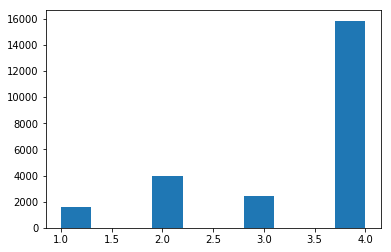

In [18]:
plt.hist(y_pred)

In [29]:
submission = df_test[['Id', 'Target']]

In [33]:
submission.to_csv('../submission.csv', index=None)

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4
5,ID_e77d38d45,4
6,ID_3c5f4bd51,4
7,ID_a849c29bd,4
8,ID_472fa82da,4
9,ID_24864adcc,4
